In [2]:
from ContNoRegret.Domains import nBox
from ContNoRegret.LossFunctions import PolynomialLossFunction, AffineLossFunction
from ContNoRegret.DualAveraging import *
import numpy as np
import ctypes
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dom = nBox([(0,1), (0,1)])
Loss = PolynomialLossFunction(dom, [1, 2, 1], [(2,0), (1,1), (0,2)])
Loss.set_bounds([0, 4])
# Loss = AffineLossFunction(dom, (1,1), 0)
# Loss.set_bounds([0, 2])
# potential = CompositeOmegaPotential(gamma=3)
potential = pNormPotential(1.5)
eta = 0.1

In [4]:
nustar(dom, potential, eta, Loss)

-11.131326442316086

In [10]:
gammas = [1.25, 1.5, 1.75, 2, 2.5, 3, 3.5, 4]
nustars = [nustar(dom, CompositeOmegaPotential(gamma), eta, Loss) for gamma in gammas]

In [10]:
ps = np.linspace(1.05, 2, 10)
nustars = [nustar(dom, pNormPotential(p), eta, Loss) for p in ps]

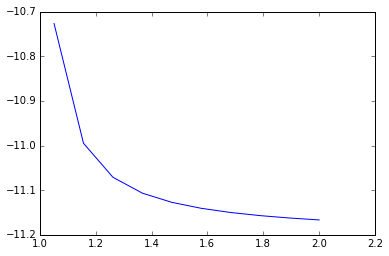

In [11]:
plt.plot(ps, nustars)

In [12]:
ps

array([ 1.05      ,  1.15555556,  1.26111111,  1.36666667,  1.47222222,
        1.57777778,  1.68333333,  1.78888889,  1.89444444,  2.        ])

In [13]:
import numpy as np
from ContNoRegret.Domains import nBox
dom = nBox([(0,1), (0,1)])
T = 2500

In [14]:
epsilon = 0.2
mu = (1-epsilon)*(0.5 + 0.5*np.array([np.sin(np.linspace(0, 2*np.pi, T)), np.cos(np.linspace(0, 2*np.pi, T))])) + epsilon*dom.sample_uniform(T) 

ValueError: operands could not be broadcast together with shapes (2,2500) (2500,2) 

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

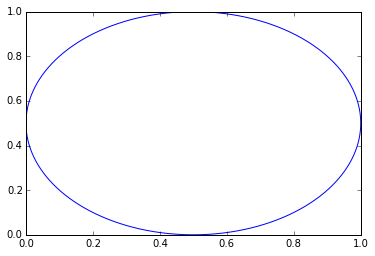

In [11]:
plt.plot(mu[0,:], mu[1,:])

In [9]:
mu.shape

(2, 2500)